<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b>  Bangalore Housing Price </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement
Predicting the house price in Bengaluru. This predictive model will help the people to make purchasing/renting decisions by predicting fair housing prices.


## About the dataset ()
Dataset Description : Housing price dataset of Bengaluru city is provided as train dataset (train.csv). Along with the train dataset, two more external reference datasets (avg_rent.csv & dist_from_city_centre.csv ) is given for further feature engineering.

Below are the datasets and features details train.csv : · area_type: The type of the house area feature 'total_sqft' specifies. · availability: The availability date or availability status of the property. · location: The locality of the property in Bengaluru city. · size: The size of the housing property in BHK (or Bedrooms etc.,). · society: The name of the Apartment. This name is encrypted for confidentiality. · total_sqft: The 'area_type' area of the property. · bath: Number of bathrooms available in the house. · balcony: Number of balcony/balconies the house has. · price: Price of the housing property in Lakhs. (target feature)

The test.csv dataset contains similar information to train.csv but does not disclose the “price” feature. The price has to be predicted through your model.

avg_rent.csv : · location : The locality of the property in the bengaluru city. · avg_2bhk_rent : Average rent of two BHK flat in that location

dist_from_city_centre.csv : · location : The locality of the property in the bengaluru city. · dist_from_city : Distance of the location from city center

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Remove Insignificant Variables](#drop)**
    - 2.4 - **[Missing Value Treatment](#null)**
    - 2.5 - **[Dummy Encode the Categorical Variables](#dummy)**
    - 2.6 - **[Scale the Data](#scale)**
    - 2.7 - **[Train-Test Split](#split)**

7. **[GridSearchCV](#GScv)**

In [1]:
## Best Result of 104 is achieved through XGB Regressor . Output is in sample_house_xg_grid.csv

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
# import 'Numpy' 
import numpy as np

# import 'Pandas' 
import pandas as pd

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

#### Read the dataset and print the first five observations.

In [3]:
# load the csv file
# store the data in 'df_train'
df_train = pd.read_csv(r'C:\Users\Jisha C U\Downloads\Hack\train.csv')
# display first five observations using head()
df_train.head()

ID             area_type   availability                  location  \
0   0  Super built-up  Area         19-Dec  Electronic City Phase II   
1   1            Plot  Area  Ready To Move          Chikka Tirupathi   
2   2        Built-up  Area  Ready To Move               Uttarahalli   
3   3  Super built-up  Area  Ready To Move        Lingadheeranahalli   
4   4  Super built-up  Area  Ready To Move                  Kothanur   

        size  society total_sqft     bath  balcony      price  
0      2 BHK  Coomee        1056 2.000000 1.000000  39.070000  
1  4 Bedroom  Theanmp       2600 5.000000 3.000000 120.000000  
2      3 BHK      NaN       1440 2.000000 3.000000  62.000000  
3      3 BHK  Soiewre       1521 3.000000 1.000000  95.000000  
4      2 BHK      NaN       1200 2.000000 1.000000  51.000000

In [4]:
df_train.shape

(10656, 10)

In [6]:
df_train.size

106560

In [8]:
df_train.describe()

ID         bath      balcony        price
count 10656.000000 10591.000000 10152.000000 10656.000000
mean   5327.500000     2.690586     1.581757   112.214256
std    3076.266568     1.352403     0.821357   142.231967
min       0.000000     1.000000     0.000000     8.000000
25%    2663.750000     2.000000     1.000000    50.000000
50%    5327.500000     2.000000     2.000000    72.000000
75%    7991.250000     3.000000     2.000000   120.000000
max   10655.000000    40.000000     3.000000  2700.000000

In [9]:
df_train.columns

Index(['ID', 'area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

## Missing Value

In [7]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_train.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_train.isnull().sum()*100/df_train.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

Total  Percentage of Missing Values
society        4428                     41.554054
balcony         504                      4.729730
bath             65                      0.609985
size             14                      0.131381
location          1                      0.009384
price             0                      0.000000
total_sqft        0                      0.000000
availability      0                      0.000000
area_type         0                      0.000000
ID                0                      0.000000

In [8]:
df_train1=df_train.drop(['society','availability','area_type'],axis=1)

In [9]:
df_train1['room']=df_train1['size'].str.replace('Bedroom','BHK')

In [10]:
df_train1['room']=df_train1['room'].str.replace('RK','BHK')

In [11]:
df_train1=df_train1.drop('size',axis=1)

In [12]:
df_train1.bath.value_counts()

2.000000     5530
3.000000     2608
4.000000      991
1.000000      639
5.000000      411
6.000000      216
7.000000       86
8.000000       48
9.000000       35
10.000000      11
12.000000       7
16.000000       2
11.000000       2
13.000000       1
14.000000       1
40.000000       1
15.000000       1
27.000000       1
Name: bath, dtype: int64

In [13]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_train1.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_train1.isnull().sum()*100/df_train1.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

Total  Percentage of Missing Values
balcony       504                      4.729730
bath           65                      0.609985
room           14                      0.131381
location        1                      0.009384
price           0                      0.000000
total_sqft      0                      0.000000
ID              0                      0.000000

In [14]:
 df_train1['room'] = df_train1.room.fillna(value=str(df_train1.room.mode()[0]))

In [15]:
 df_train1[df_train1['room'] == '43 BHK']

ID     location total_sqft      bath  balcony      price    room
4684  4684  Munnekollal       2400 40.000000 0.000000 660.000000  43 BHK

In [16]:
df_train1 = df_train1.drop(df_train1[df_train1['room'] == '43 BHK'].index)

In [17]:
df_train1['bath'] = df_train1.bath.fillna(value=str(df_train1.bath.mode()[0]))

In [18]:
df_train1["total_sqft"]= df_train1["total_sqft"].astype(str)

In [19]:
def sqft(x):
    y = x.split("-")
    if len(y) == 2:
        return (float(y[0])+float(y[1]))/2
    elif len(y) == 1:
        return x
    else:
        return None

In [20]:
df_train1["total_sqft"] = df_train1["total_sqft"].apply(sqft)

In [21]:
df_train1["total_sqft"]= df_train1["total_sqft"].str.replace("Sq. Meter", "")
df_train1["total_sqft"]= df_train1["total_sqft"].str.replace("Acres", "")
df_train1["total_sqft"]= df_train1["total_sqft"].str.replace("Sq. Yard", "")
df_train1["total_sqft"]= df_train1["total_sqft"].str.replace("s", "")
df_train1["total_sqft"]= df_train1["total_sqft"].str.replace("Cent", "")
df_train1["total_sqft"]= df_train1["total_sqft"].str.replace("Guntha", "")
df_train1["total_sqft"]= df_train1["total_sqft"].str.replace("Ground", "")
df_train1["total_sqft"]= df_train1["total_sqft"].str.replace("Perch", "")

In [22]:
df_train1["total_sqft"]= df_train1["total_sqft"].astype(float)

In [23]:
df_train1.size

74585

In [24]:
df_room_sqft=df_train1.groupby('room')['total_sqft'].mean()
df_room_sqft

room
1 BHK      758.179700
10 BHK    2892.600000
11 BHK    3350.000000
12 BHK    2232.000000
13 BHK    5425.000000
14 BHK    1250.000000
16 BHK   10000.000000
19 BHK    2000.000000
2 BHK     1135.907564
27 BHK    8000.000000
3 BHK     1678.716878
4 BHK     2703.282631
5 BHK     2405.212366
6 BHK     1809.674286
7 BHK     2329.207792
8 BHK     1813.485294
9 BHK     3008.083333
Name: total_sqft, dtype: float64

In [25]:
df_room_sqft.loc['1 BHK']

758.1797

In [26]:
df_room_balcony=df_train1.groupby('room')['balcony'].max()
df_room_balcony

room
1 BHK    3.000000
10 BHK   3.000000
11 BHK   3.000000
12 BHK   2.000000
13 BHK   0.000000
14 BHK   0.000000
16 BHK        nan
19 BHK        nan
2 BHK    3.000000
27 BHK   0.000000
3 BHK    3.000000
4 BHK    3.000000
5 BHK    3.000000
6 BHK    3.000000
7 BHK    3.000000
8 BHK    3.000000
9 BHK    3.000000
Name: balcony, dtype: float64

In [27]:
value_ofbalcony = lambda x : df_room_balcony.loc[x]

In [28]:
value_ofsqft = lambda x : df_room_sqft.loc[x]

In [29]:
df_train1['total_sqft']= df_train1[['room','total_sqft']].apply( lambda x: np.where(np.isnan(x['total_sqft']), value_ofsqft(x['room']), x['total_sqft']),axis=1)

In [30]:
df_train1['balcony'] = df_train1[['room','balcony']].apply( lambda x: np.where(np.isnan(x['balcony']),value_ofbalcony(x['room']), x['balcony']),axis=1)

In [31]:
df_train1.bath = df_train1.bath.astype(float)
df_train1.balcony = df_train1.balcony.astype(float)

In [32]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10655 entries, 0 to 10655
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10655 non-null  int64  
 1   location    10654 non-null  object 
 2   total_sqft  10655 non-null  object 
 3   bath        10655 non-null  float64
 4   balcony     10653 non-null  float64
 5   price       10655 non-null  float64
 6   room        10655 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 665.9+ KB


In [33]:
df_train1.head(5)

ID                  location total_sqft     bath  balcony      price   room
0   0  Electronic City Phase II     1056.0 2.000000 1.000000  39.070000  2 BHK
1   1          Chikka Tirupathi     2600.0 5.000000 3.000000 120.000000  4 BHK
2   2               Uttarahalli     1440.0 2.000000 3.000000  62.000000  3 BHK
3   3        Lingadheeranahalli     1521.0 3.000000 1.000000  95.000000  3 BHK
4   4                  Kothanur     1200.0 2.000000 1.000000  51.000000  2 BHK

In [34]:
df_train1['total_sqft'] = df_train1['total_sqft'].astype(float)

In [35]:
df_train1[df_train1.isnull().any(axis=1)]

ID                       location   total_sqft      bath  balcony  \
568    568                            NaN  1600.000000  3.000000 2.000000   
3379  3379                 1Hanuman Nagar  2000.000000 16.000000      nan   
3609  3609  Koramangala Industrial Layout 10000.000000 16.000000      nan   

          price    room  
568   86.000000   3 BHK  
3379 490.000000  19 BHK  
3609 550.000000  16 BHK

In [36]:
df_train1.balcony.fillna(0,inplace=True)

In [37]:
df_train1['bhk'] =  df_train1['room'].apply(lambda x : int(x[0]))

In [38]:
df_train1=df_train1[~(df_train1['total_sqft']/df_train1['bhk']<300)]

In [39]:
df_train1.dropna(inplace=True)

In [40]:
df_train1.shape

(10035, 8)

In [41]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10035 entries, 0 to 10655
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10035 non-null  int64  
 1   location    10035 non-null  object 
 2   total_sqft  10035 non-null  float64
 3   bath        10035 non-null  float64
 4   balcony     10035 non-null  float64
 5   price       10035 non-null  float64
 6   room        10035 non-null  object 
 7   bhk         10035 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 705.6+ KB


In [42]:
df_test = pd.read_csv(r'C:\Users\Jisha C U\Downloads\Hack\test.csv')

# display first five observations using head()
df_test.head(5)

ID             area_type   availability            location       size  \
0   0  Super built-up  Area  Ready To Move          Chamrajpet      2 BHK   
1   1  Super built-up  Area  Ready To Move  7th Phase JP Nagar      3 BHK   
2   2  Super built-up  Area  Ready To Move          Whitefield      3 BHK   
3   3        Built-up  Area  Ready To Move           Jalahalli      2 BHK   
4   4            Plot  Area  Ready To Move           TC Palaya  1 Bedroom   

   society total_sqft     bath  balcony  
0      NaN        650 1.000000 1.000000  
1  SrncyRe       1370 2.000000 1.000000  
2  AjhalNa       1725 3.000000 2.000000  
3      NaN       1000 2.000000 0.000000  
4      NaN       1350 1.000000 0.000000

In [43]:
df_test.shape

(2664, 9)

In [44]:
df_test=df_test.drop(['availability','society','area_type'],axis=1)

In [45]:
df_test['room']=df_test['size'].str.replace('Bedroom','BHK')
df_test['room']=df_test['room'].str.replace('RK','BHK')
df_test['room'].value_counts()

2 BHK     1101
3 BHK      986
4 BHK      280
1 BHK      120
5 BHK       74
6 BHK       46
7 BHK       23
8 BHK       21
9 BHK        6
10 BHK       4
18 BHK       1
Name: room, dtype: int64

In [46]:
str(df_test.room.mode()[0])

'2 BHK'

In [47]:
 df_test['room'] = df_test.room.fillna(value=str(df_test.room.mode()[0]))

In [48]:
df_test.drop('size',axis=1,inplace=True)

In [49]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_test.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_test.isnull().sum()*100/df_test.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

Total  Percentage of Missing Values
balcony       105                      3.941441
bath            8                      0.300300
room            0                      0.000000
total_sqft      0                      0.000000
location        0                      0.000000
ID              0                      0.000000

In [50]:
df_test["total_sqft"]= df_test["total_sqft"].astype(str)
df_test["total_sqft"] = df_test["total_sqft"].apply(sqft)
df_test["total_sqft"]= df_test["total_sqft"].str.replace("Sq. Meter", "")
df_test["total_sqft"]= df_test["total_sqft"].str.replace("Acres", "")
df_test["total_sqft"]= df_test["total_sqft"].str.replace("Sq. Yard", "")
df_test["total_sqft"]= df_test["total_sqft"].str.replace("s", "")
df_test["total_sqft"]= df_test["total_sqft"].str.replace("Cent", "")
df_test["total_sqft"]= df_test["total_sqft"].str.replace("Guntha", "")
df_test["total_sqft"]= df_test["total_sqft"].str.replace("Ground", "")
df_test["total_sqft"]= df_test["total_sqft"].str.replace("Perch", "")
df_test["total_sqft"]= df_test["total_sqft"].astype(float)

In [51]:
 df_test['bath'] = df_test.bath.fillna(value=str(df_test.bath.mode()[0]))

In [52]:
df_room_sqft_test=df_test.groupby('room')['total_sqft'].mean()
df_room_sqft_test


room
1 BHK     686.867257
10 BHK   4707.500000
18 BHK   1200.000000
2 BHK    1147.776106
3 BHK    1654.445861
4 BHK    2608.099631
5 BHK    2210.768108
6 BHK    2893.303696
7 BHK    2244.608696
8 BHK    2253.523810
9 BHK    2123.000000
Name: total_sqft, dtype: float64

In [53]:
df_room_balcony_test=df_test.groupby('room')['balcony'].max()
df_room_balcony_test

room
1 BHK    3.000000
10 BHK   3.000000
18 BHK        nan
2 BHK    3.000000
3 BHK    3.000000
4 BHK    3.000000
5 BHK    3.000000
6 BHK    3.000000
7 BHK    3.000000
8 BHK    3.000000
9 BHK    2.000000
Name: balcony, dtype: float64

In [54]:
value_ofbalcony_test = lambda x : df_room_balcony_test.loc[x]
value_ofsqft_test = lambda x : df_room_sqft_test.loc[x]


In [55]:
df_test['total_sqft']= df_test[['room','total_sqft']].apply( lambda x: np.where(np.isnan(x['total_sqft']), value_ofsqft_test(x['room']), x['total_sqft']),axis=1)
df_test['balcony'] = df_test[['room','balcony']].apply( lambda x: np.where(np.isnan(x['balcony']),value_ofbalcony_test(x['room']), x['balcony']),axis=1)

In [56]:
df_test[df_test.room=="18 BHK"]

ID       location total_sqft      bath balcony    room
903  903  1Kasavanhalli     1200.0 18.000000     nan  18 BHK

In [57]:
df_test[df_test.isnull().any(axis=1)]

Empty DataFrame
Columns: [ID, location, total_sqft, bath, balcony, room]
Index: []

In [58]:
df_test.balcony.fillna(0,inplace=True)

In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          2664 non-null   int64 
 1   location    2664 non-null   object
 2   total_sqft  2664 non-null   object
 3   bath        2664 non-null   object
 4   balcony     2664 non-null   object
 5   room        2664 non-null   object
dtypes: int64(1), object(5)
memory usage: 125.0+ KB


In [60]:
df_test.total_sqft=df_test.total_sqft.astype(float)
df_test.bath=df_test.bath.astype(float)
df_test.balcony=df_test.balcony.astype(float)


In [61]:
df_avg_rent=pd.read_csv(r'C:\Users\Jisha C U\Downloads\Hack\avg_rent.csv')

# display first five observations using head()
df_avg_rent.head()

location  avg_2bhk_rent
0                Krishnarajapura          11954
1                       Sarjapur          45000
2  Whitefield Hope Farm Junction          26370
3                    Devanahalli          17302
4                     Whitefield          14981

In [62]:
df_dist=pd.read_csv(r'C:\Users\Jisha C U\Downloads\Hack\dist_from_city_centre.csv')

# display first five observations using head()
df_dist.head(10)

location  dist_from_city
0             Whitefield       17.300000
1         Sarjapur  Road       17.200000
2        Electronic City       18.100000
3         Kanakpura Road       26.500000
4            Thanisandra       11.500000
5              Yelahanka       20.800000
6            Uttarahalli       12.900000
7                 Hebbal       11.100000
8           Marathahalli       10.900000
9  Raja Rajeshwari Nagar       15.300000

In [63]:
df_dist= df_dist.drop_duplicates(subset=['location'],keep='last')
df_avg_rent= df_avg_rent.drop_duplicates(subset=['location'],keep='last')

In [64]:
df_dist[df_dist['location']=="Judicial Layout"]

location  dist_from_city
167  Judicial Layout       16.300000

In [65]:
len(df_dist.location)

500

In [66]:
len(df_avg_rent)

157

In [67]:
df_test.location=df_test.location.apply(lambda x: x.strip())
df_train1.location = df_train1.location.apply(lambda x: x.strip())
df_dist.location=df_dist.location.apply(lambda x: x.strip())
df_avg_rent.location=df_avg_rent.location.apply(lambda x: x.strip())

In [68]:
len(df_train1.location.value_counts())

1106

In [69]:
df_test["location"]=df_test.location.apply(lambda x: x.split(',')[0])
df_train1["location"] = df_train1.location.apply(lambda x: x.split(',')[0])
df_dist["location"]=df_dist.location.apply(lambda x: x.split(',')[0])
df_avg_rent["location"]=df_avg_rent.location.apply(lambda x:x.split(',')[0])

In [70]:
df_test.head(5)

ID            location  total_sqft     bath  balcony   room
0   0          Chamrajpet  650.000000 1.000000 1.000000  2 BHK
1   1  7th Phase JP Nagar 1370.000000 2.000000 1.000000  3 BHK
2   2          Whitefield 1725.000000 3.000000 2.000000  3 BHK
3   3           Jalahalli 1000.000000 2.000000 0.000000  2 BHK
4   4           TC Palaya 1350.000000 1.000000 0.000000  1 BHK

In [71]:
df_avg_rent.head()

location  avg_2bhk_rent
0                Krishnarajapura          11954
1                       Sarjapur          45000
2  Whitefield Hope Farm Junction          26370
3                    Devanahalli          17302
4                     Whitefield          14981

In [73]:
df_dist=df_dist.drop_duplicates(subset=['location'],keep='last')
df_avg_rent=df_avg_rent.drop_duplicates(subset=['location'],keep='last')

In [74]:
def locate(dist):
    if (dist<=3) :
        gp= "Group1"
    elif (dist<=6):
        gp ="Group2"
    elif (dist<=9):
        gp ="Group3"
    elif (dist<=12):
        gp ="Group4"
    elif (dist<=15):
        gp ="Group5"
    elif (dist<=18):
        gp ="Group6"
    elif (dist<=21):
        gp ="Group7" 
    elif (dist<=25):
        gp ="Group8"
    elif (dist<=30):
        gp ="Group9"
    elif (dist<=35):
        gp ="Group10"
    else:
        gp ="Group11"
    return(gp)                                                                        

In [75]:
def room_gp(num):

    if (num in ['1 BHK','2 BHK','3 BHK','4 BHK','5 BHK','6 BHK','7 BHK','8 BHK']): #,'9 BHK','10 BHK']) :
        gp=num
    else:
        gp="Large BHK"
    return gp

In [76]:
df_train1 = df_train1.merge(df_dist, on='location', how='left')
df_train1 = df_train1.merge(df_avg_rent, on='location', how='left')

In [77]:
df_train1.head(10)

ID                  location  total_sqft     bath  balcony      price  \
0   0  Electronic City Phase II 1056.000000 2.000000 1.000000  39.070000   
1   1          Chikka Tirupathi 2600.000000 5.000000 3.000000 120.000000   
2   2               Uttarahalli 1440.000000 2.000000 3.000000  62.000000   
3   3        Lingadheeranahalli 1521.000000 3.000000 1.000000  95.000000   
4   4                  Kothanur 1200.000000 2.000000 1.000000  51.000000   
5   5                Whitefield 1170.000000 2.000000 1.000000  38.000000   
6   6          Old Airport Road 2732.000000 4.000000 3.000000 204.000000   
7   7              Rajaji Nagar 3300.000000 4.000000 3.000000 600.000000   
8   8              Marathahalli 1310.000000 3.000000 1.000000  63.250000   
9  10                Whitefield 1800.000000 2.000000 2.000000  70.000000   

    room  bhk  dist_from_city  avg_2bhk_rent  
0  2 BHK    2       19.300000   11500.000000  
1  4 BHK    4       34.600000            nan  
2  3 BHK    3       12.900000   19750.000000  
3  3 BHK    3       21.400000            nan  
4  2 BHK    2       11.800000   16375.000000  
5  2 BHK    2       17.300000   14981.000000  
6  4 BHK    4        9.900000            nan  
7  4 BHK    4        9.600000            nan  
8  3 BHK    3       10.900000   16620.000000  
9  3 BHK    3       17.300000   14981.000000

In [78]:
df_train1[df_train1.isnull().any(axis=1)]

ID                                  location   total_sqft      bath  \
1          1                          Chikka Tirupathi  2600.000000  5.000000   
3          3                        Lingadheeranahalli  1521.000000  3.000000   
6          6                          Old Airport Road  2732.000000  4.000000   
7          7                              Rajaji Nagar  3300.000000  4.000000   
11        12                        7th Phase JP Nagar  1000.000000  2.000000   
14        15                               Mysore Road  1175.000000  2.000000   
15        16                             Bisuvanahalli  1180.000000  3.000000   
16        17                     Raja Rajeshwari Nagar  1540.000000  3.000000   
17        18                     Ramakrishnappa Layout  2770.000000  4.000000   
18        19                        Manayata Tech Park  1100.000000  2.000000   
20        21                                Binny Pete  1755.000000  3.000000   
24        25                           Mangammanapalya  1250.000000  3.000000   
25        26                           Electronic City   660.000000  1.000000   
28        29                           Electronic City  1025.000000  2.000000   
30        31                             Bisuvanahalli  1075.000000  2.000000   
32        33                     Raja Rajeshwari Nagar  1693.000000  3.000000   
34        35                            Kanakpura Road   700.000000  2.000000   
35        36                  Electronics City Phase 1  1070.000000  2.000000   
36        37                              Kundalahalli  1724.000000  3.000000   
40        41                            Sarjapur  Road  1254.000000  3.000000   
41        42                               Ganga Nagar   600.000000  1.000000   
43        44                            Kanakpura Road  1330.740000  2.000000   
46        48                                  KR Puram   800.000000  1.000000   
47        49                          Himagiri Meadows   869.000000  2.000000   
48        50                              Adarsh Nagar  1270.000000  2.000000   
49        51                               Bhoganhalli  1670.000000  3.000000   
51        53                      Lakshminarayana Pura  1185.000000  2.000000   
53        55                                Begur Road  1200.000000  2.000000   
55        57                     Ramakrishnappa Layout  1500.000000  2.000000   
56        59                    Govindaraja Nagar Ward   840.000000  2.000000   
57        60                            Tharabanahalli  4395.000000  3.000000   
58        61                               Ganga Nagar   845.000000  2.000000   
65        69                            Kanakpura Road  1005.000000  2.000000   
66        71                                Begur Road  1358.000000  2.000000   
67        72                               Hegde Nagar  1569.000000  3.000000   
68        73                              Haralur Road  1240.000000  2.000000   
69        74                               Hennur Road  2089.000000  3.000000   
70        75                                 Kothannur  1206.000000  2.000000   
71        76                           Kalena Agrahara  1150.000000  2.000000   
72        77                        Cholanayakanahalli  2511.000000  3.000000   
73        79                               ISRO Layout  4400.000000  6.000000   
74        80                      Kodanda Reddy Layout  1660.000000  2.000000   
75        81                               Hennur Road  2703.282631  2.000000   
77        83                          Garudachar Palya  1325.000000  2.000000   
78        84                                 EPIP Zone  1499.000000  5.000000   
79        85                               Hegde Nagar  3000.000000  7.000000   
80        86                            Kanakpura Road  1665.000000  3.000000   
81        87                                Dasanapura   708.000000  2.000000   
82        88                             

In [79]:
df_train1.head(10)

ID                  location  total_sqft     bath  balcony      price  \
0   0  Electronic City Phase II 1056.000000 2.000000 1.000000  39.070000   
1   1          Chikka Tirupathi 2600.000000 5.000000 3.000000 120.000000   
2   2               Uttarahalli 1440.000000 2.000000 3.000000  62.000000   
3   3        Lingadheeranahalli 1521.000000 3.000000 1.000000  95.000000   
4   4                  Kothanur 1200.000000 2.000000 1.000000  51.000000   
5   5                Whitefield 1170.000000 2.000000 1.000000  38.000000   
6   6          Old Airport Road 2732.000000 4.000000 3.000000 204.000000   
7   7              Rajaji Nagar 3300.000000 4.000000 3.000000 600.000000   
8   8              Marathahalli 1310.000000 3.000000 1.000000  63.250000   
9  10                Whitefield 1800.000000 2.000000 2.000000  70.000000   

    room  bhk  dist_from_city  avg_2bhk_rent  
0  2 BHK    2       19.300000   11500.000000  
1  4 BHK    4       34.600000            nan  
2  3 BHK    3       12.900000   19750.000000  
3  3 BHK    3       21.400000            nan  
4  2 BHK    2       11.800000   16375.000000  
5  2 BHK    2       17.300000   14981.000000  
6  4 BHK    4        9.900000            nan  
7  4 BHK    4        9.600000            nan  
8  3 BHK    3       10.900000   16620.000000  
9  3 BHK    3       17.300000   14981.000000

In [80]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          2664 non-null   int64  
 1   location    2664 non-null   object 
 2   total_sqft  2664 non-null   float64
 3   bath        2664 non-null   float64
 4   balcony     2663 non-null   float64
 5   room        2664 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 125.0+ KB


In [81]:
df_train1[(df_train1['total_sqft']/df_train1['bhk']<300)]

Empty DataFrame
Columns: [ID, location, total_sqft, bath, balcony, price, room, bhk, dist_from_city, avg_2bhk_rent]
Index: []

In [82]:
df_train1.shape

(10035, 10)

In [83]:
df_train1["room_gp"] = df_train1["room"].apply(lambda x: room_gp(x))
df_test["room_gp"] = df_test["room"].apply(lambda x: room_gp(x))

In [84]:
df_train1['dist_from_city'].fillna(value=(df_train1['dist_from_city'].mean()),inplace=True)

In [85]:
df_test.shape

(2664, 7)

In [86]:
df_dist[df_dist.duplicated(subset=['location'])]

Empty DataFrame
Columns: [location, dist_from_city]
Index: []

In [87]:
df_test = df_test.merge(df_dist, on='location', how='left')
df_test = df_test.merge(df_avg_rent, on='location', how='left')

In [88]:
#df_test[df_test.duplicated(subset='loca')]

In [89]:
df_test.shape

(2664, 9)

In [90]:
df_test[df_test.isnull().any(axis=1)]

ID                                         location   total_sqft  \
1        1                               7th Phase JP Nagar  1370.000000   
4        4                                        TC Palaya  1350.000000   
5        5                               7th Phase JP Nagar  3200.000000   
7        7                                   Kanakpura Road   700.000000   
8        8                                     Shanthi Pura   800.000000   
9        9                                     Rajaji Nagar  2367.000000   
10      10                                     Sonnenahalli  1415.000000   
11      11                               7th Phase JP Nagar  1976.000000   
12      12                                        Kambipura   883.000000   
22      22                     Basaveshwara Nagar Yelahanka  1055.000000   
23      23                                     Rajaji Nagar  1555.000000   
25      25                                     Viviani Road  2214.000000   
27      27                                      Bhoganhalli   896.900000   
28      28                                       Giri Nagar  4000.000000   
29      29                                         KR Puram  1035.000000   
31      31                                    Keshava Nagar  1839.000000   
32      32                                       Begur Road  1200.000000   
34      34                            Banashankari Stage II  1200.000000   
35      35                               Sampangirama Nagar  2760.000000   
36      36                                     Gunjur Palya   993.000000   
38      38                                        TC Palaya   900.000000   
39      39                                  Electronic City  1200.000000   
40      40                                          Sompura   825.000000   
42      42                              Hosahalli Extension  1350.000000   
44      44                                    Shankarapuram   925.000000   
45      45                                   Kanakpura Road  1167.000000   
47      47                                  Byatarayanapura   650.000000   
48      48                                   Sarjapur  Road   675.000000   
49      49                         Doctor Layout Rayasandra  2260.000000   
50      50                                     Anwar Layout   686.867257   
53      53                                 Pillanna Gardens   550.000000   
57      57                                  Ullal Uppanagar  2400.000000   
59      59                                   Prithvi Layout  2100.000000   
60      60                                       Pai Layout  1000.000000   
61      61                            Banashankari Stage VI   600.000000   
63      63                                   Kanakpura Road  1419.590000   
64      64                                        Kodihalli  1400.000000   
65      65                                   Horamavu Agara   750.000000   
69      69                                         JP Nagar  2400.000000   
70      70                                   Sarjapur  Road  1654.445861   
71      71                                  Electronic City  1342.000000   
72      72                                   Chandra Layout  1600.000000   
74      74                                         Budigere  1820.000000   
75      75                                      Bhoganhalli  2439.000000   
76      76                                   Kanakpura Road  1665.000000   
77      77                                      Basavangudi  1850.000000   
79      79                                   Sarjapur  Road  1346.000000   
80      80                                     Rajaji Nagar  1720.000000   
82      82                                         JP Nagar  1060.000000   
86      86                               Basaveshwara Nagar  1200.000000   
89      89                              Devarabeesana Halli  1296.000000   
90      90                                   Doctors Lay

In [91]:
df_test.tail(10)

ID               location  total_sqft     bath  balcony   room  \
2654  2654           Rachenahalli 1050.000000 2.000000 2.000000  2 BHK   
2655  2655       Ramamurthy Nagar 1500.000000 9.000000 2.000000  7 BHK   
2656  2656              Bellandur 1262.000000 2.000000 2.000000  2 BHK   
2657  2657            Uttarahalli 1345.000000 2.000000 1.000000  3 BHK   
2658  2658      Green Glen Layout 1715.000000 3.000000 3.000000  3 BHK   
2659  2659             Whitefield 3453.000000 4.000000 0.000000  5 BHK   
2660  2660          Richards Town 3600.000000 5.000000 3.000000  4 BHK   
2661  2661  Raja Rajeshwari Nagar 1141.000000 2.000000 1.000000  2 BHK   
2662  2662        Padmanabhanagar 4689.000000 4.000000 1.000000  4 BHK   
2663  2663           Doddathoguru  550.000000 1.000000 1.000000  1 BHK   

     room_gp  dist_from_city  avg_2bhk_rent  
2654   2 BHK       13.000000            nan  
2655   7 BHK       11.700000   14647.000000  
2656   2 BHK       12.900000   19667.000000  
2657   3 BHK       12.900000   19750.000000  
2658   3 BHK       16.900000            nan  
2659   5 BHK       17.300000   14981.000000  
2660   4 BHK        5.600000            nan  
2661   2 BHK       15.300000            nan  
2662   4 BHK       11.300000            nan  
2663   1 BHK       19.600000   13625.000000

In [92]:
df_test[df_test.room=="18 BHK"]

ID       location  total_sqft      bath  balcony    room    room_gp  \
903  903  1Kasavanhalli 1200.000000 18.000000      nan  18 BHK  Large BHK   

     dist_from_city  avg_2bhk_rent  
903             nan            nan

In [93]:
df_test.balcony.fillna(0,inplace=True)

In [94]:
#df_test['avg_2bhk_rent'].fillna(value=(df_test['total_sqft']*12.5),inplace=True)
df_test['dist_from_city'].fillna(value=(df_test['dist_from_city'].mean()),inplace=True)

In [95]:
df_test[df_test.isnull().any(axis=1)]

ID                                         location   total_sqft  \
1        1                               7th Phase JP Nagar  1370.000000   
4        4                                        TC Palaya  1350.000000   
5        5                               7th Phase JP Nagar  3200.000000   
7        7                                   Kanakpura Road   700.000000   
8        8                                     Shanthi Pura   800.000000   
9        9                                     Rajaji Nagar  2367.000000   
10      10                                     Sonnenahalli  1415.000000   
11      11                               7th Phase JP Nagar  1976.000000   
12      12                                        Kambipura   883.000000   
22      22                     Basaveshwara Nagar Yelahanka  1055.000000   
23      23                                     Rajaji Nagar  1555.000000   
25      25                                     Viviani Road  2214.000000   
27      27                                      Bhoganhalli   896.900000   
28      28                                       Giri Nagar  4000.000000   
29      29                                         KR Puram  1035.000000   
31      31                                    Keshava Nagar  1839.000000   
32      32                                       Begur Road  1200.000000   
34      34                            Banashankari Stage II  1200.000000   
35      35                               Sampangirama Nagar  2760.000000   
36      36                                     Gunjur Palya   993.000000   
38      38                                        TC Palaya   900.000000   
39      39                                  Electronic City  1200.000000   
40      40                                          Sompura   825.000000   
42      42                              Hosahalli Extension  1350.000000   
44      44                                    Shankarapuram   925.000000   
45      45                                   Kanakpura Road  1167.000000   
47      47                                  Byatarayanapura   650.000000   
48      48                                   Sarjapur  Road   675.000000   
49      49                         Doctor Layout Rayasandra  2260.000000   
50      50                                     Anwar Layout   686.867257   
53      53                                 Pillanna Gardens   550.000000   
57      57                                  Ullal Uppanagar  2400.000000   
59      59                                   Prithvi Layout  2100.000000   
60      60                                       Pai Layout  1000.000000   
61      61                            Banashankari Stage VI   600.000000   
63      63                                   Kanakpura Road  1419.590000   
64      64                                        Kodihalli  1400.000000   
65      65                                   Horamavu Agara   750.000000   
69      69                                         JP Nagar  2400.000000   
70      70                                   Sarjapur  Road  1654.445861   
71      71                                  Electronic City  1342.000000   
72      72                                   Chandra Layout  1600.000000   
74      74                                         Budigere  1820.000000   
75      75                                      Bhoganhalli  2439.000000   
76      76                                   Kanakpura Road  1665.000000   
77      77                                      Basavangudi  1850.000000   
79      79                                   Sarjapur  Road  1346.000000   
80      80                                     Rajaji Nagar  1720.000000   
82      82                                         JP Nagar  1060.000000   
86      86                               Basaveshwara Nagar  1200.000000   
89      89                              Devarabeesana Halli  1296.000000   
90      90                                   Doctors Lay

In [96]:

df_test["loc_dist_gp"] = df_test["dist_from_city"].apply(lambda x: locate(x))


In [97]:
df_train1["loc_dist_gp"] = df_train1["dist_from_city"].apply(lambda x: locate(x))


In [98]:
df_train1.head()

ID                  location  total_sqft     bath  balcony      price  \
0   0  Electronic City Phase II 1056.000000 2.000000 1.000000  39.070000   
1   1          Chikka Tirupathi 2600.000000 5.000000 3.000000 120.000000   
2   2               Uttarahalli 1440.000000 2.000000 3.000000  62.000000   
3   3        Lingadheeranahalli 1521.000000 3.000000 1.000000  95.000000   
4   4                  Kothanur 1200.000000 2.000000 1.000000  51.000000   

    room  bhk  dist_from_city  avg_2bhk_rent room_gp loc_dist_gp  
0  2 BHK    2       19.300000   11500.000000   2 BHK      Group7  
1  4 BHK    4       34.600000            nan   4 BHK     Group10  
2  3 BHK    3       12.900000   19750.000000   3 BHK      Group5  
3  3 BHK    3       21.400000            nan   3 BHK      Group8  
4  2 BHK    2       11.800000   16375.000000   2 BHK      Group4

**Let us now see the number of variables and observations in the data.**

In [99]:
# use 'shape' to check the dimension of data
df_test.shape

(2664, 10)

In [100]:
df_train1.shape

(10035, 12)

In [101]:
#df_train1['pricepersqft']=(df_train1['price']*100000)/(df_train1['total_sqft'])

In [102]:
df_test[df_test.avg_2bhk_rent > 50000]

ID    location  total_sqft     bath  balcony   room room_gp  \
1691  1691  Kumbalgodu 3750.000000 4.000000 3.000000  4 BHK   4 BHK   

      dist_from_city  avg_2bhk_rent loc_dist_gp  
1691       15.367391  800000.000000      Group6

In [103]:
#np.where((x.avg_2bhk_rent > 50000) ,np.nan,x.avg_2bhk_rent)
df_train1['avg_2bhk_rent'] = df_train1[['avg_2bhk_rent']].apply( lambda x: np.where((x > 50000) ,np.nan,x))
df_test['avg_2bhk_rent'] = df_test[['avg_2bhk_rent']].apply( lambda x: np.where((x > 50000) ,np.nan,x))

In [104]:
#df_train1['rent']=df_train1['pricepersqft'] *  

In [105]:
#df_train1['avg_2bhk_rent'] = df_train1[['price','avg_2bhk_rent']].apply( lambda x: np.where((x["avg_2bhk_rent"] > (((x.price* 100000)*2.5)/100)) ,(((x.price* 100000)*3)/100), x["avg_2bhk_rent"]),axis=1)

In [106]:
df_train1['avg_2bhk_rent'] =df_train1['avg_2bhk_rent'].astype(float)

In [107]:
#df_train1['avg_2bhk_rent']=df_train1['avg_2bhk_rent'].fillna(value=(((df_train1.price* 100000)*2.5)/100))

In [108]:
#df_train1[df_train1.loc_dist_gp == 'Group1']

In [109]:
df_avg_2bhk=df_train1.groupby(['location','room_gp'])['price'].value_counts()

In [110]:
df_avg_2bhk

location                                  room_gp    price      
1 Annasandrapalya                         Large BHK  150.000000      1
1 Giri Nagar                              Large BHK  360.000000      1
1 Immadihalli                             Large BHK  150.000000      1
1 Ramamurthy Nagar                        Large BHK  170.000000      1
1A Block Koramangala                      4 BHK      650.000000      1
1Channasandra                             Large BHK  125.000000      1
1Hanuman Nagar                            Large BHK  490.000000      1
1Hoysalanagar                             Large BHK  275.000000      1
1st Block BEL Layout                      3 BHK      85.000000       1
                                          4 BHK      250.000000      1
1st Block HBR Layout                      1 BHK      45.000000       1
                                          5 BHK      500.000000      1
1st Block HRBR Layout                     2 BHK      67.000000       1
            

In [111]:
df_avg_2bhk_rent = df_train1.groupby('loc_dist_gp')['avg_2bhk_rent'].mean()
df_avg_2bhk_rent

loc_dist_gp
Group1    43500.000000
Group10   13690.476190
Group11   19524.027027
Group2    20673.057692
Group3    10716.721311
Group4    15702.423645
Group5    16128.444805
Group6    16660.092864
Group7    11473.901099
Group8    12336.772321
Group9    11395.818182
Name: avg_2bhk_rent, dtype: float64

In [112]:
df_avg_2bhk_rent_test = df_test.groupby('loc_dist_gp')['avg_2bhk_rent'].mean()
df_avg_2bhk_rent_test

loc_dist_gp
Group1             nan
Group10    7500.000000
Group11   19831.692308
Group2    19750.000000
Group3    12885.596491
Group4    15475.913706
Group5    16003.854545
Group6    16577.134058
Group7    11849.557522
Group8    12799.983051
Group9    11186.363636
Name: avg_2bhk_rent, dtype: float64

In [113]:
def val_of_2bhk(group):
    return df_avg_2bhk_rent[group]

In [114]:
def val_of_2bhk_test(group):
    rent= df_avg_2bhk_rent_test[group] 
    if (np.isnan(rent)):
        rent=val_of_2bhk(group)
    
    return rent

In [115]:
df_test.room_gp.value_counts()

2 BHK        1103
3 BHK         986
4 BHK         280
1 BHK         120
5 BHK          74
6 BHK          46
7 BHK          23
8 BHK          21
Large BHK      11
Name: room_gp, dtype: int64

In [116]:
df_train1.room_gp.value_counts()

2 BHK        4401
3 BHK        3781
4 BHK        1015
1 BHK         525
5 BHK         165
6 BHK          68
Large BHK      34
7 BHK          30
8 BHK          16
Name: room_gp, dtype: int64

In [117]:
#df_test.avg_2bhk_rent.value_counts()

In [118]:
#df_train1['avg_2bhk_rent1']=df_train1['avg_2bhk_rent'].fillna(value=(df_train1['total_sqft']*12.5))
df_train1['avg_2bhk_rent'] = df_train1[['loc_dist_gp','avg_2bhk_rent']].apply( lambda x: np.where(np.isnan(x['avg_2bhk_rent']),val_of_2bhk(x['loc_dist_gp']), x['avg_2bhk_rent']),axis=1)
df_test['avg_2bhk_rent'] = df_test[['loc_dist_gp','avg_2bhk_rent']].apply( lambda x: np.where(np.isnan(x['avg_2bhk_rent']),val_of_2bhk_test(x['loc_dist_gp']), x['avg_2bhk_rent']),axis=1)

In [119]:
df_train1['avg_2bhk_rent'] =df_train1['avg_2bhk_rent'].astype(float)
df_test['avg_2bhk_rent'] =df_test['avg_2bhk_rent'].astype(float)

df_train1['avg_2bhk_rent'] = df_train1['avg_2bhk_rent'].fillna(value=df_train1['avg_2bhk_rent'].mean())
df_test['avg_2bhk_rent'] = df_test['avg_2bhk_rent'].fillna(value=df_test['avg_2bhk_rent'].mean())

In [120]:
df_train1.drop(["location","room","bhk"],axis=1,inplace=True)
df_test.drop(["location","room"],axis=1,inplace=True)

#avg_2bhk_rent

In [121]:
df_train1['room_gp'].value_counts()

2 BHK        4401
3 BHK        3781
4 BHK        1015
1 BHK         525
5 BHK         165
6 BHK          68
Large BHK      34
7 BHK          30
8 BHK          16
Name: room_gp, dtype: int64

<a id="dtype"></a>
## 2.2 Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [122]:
# use 'dtypes' to check the data type of a variable
df_test.dtypes

ID                  int64
total_sqft        float64
bath              float64
balcony           float64
room_gp            object
dist_from_city    float64
avg_2bhk_rent     float64
loc_dist_gp        object
dtype: object

**Interpretation:** 

<a id="dummy"></a>
## 2.5 Dummy Encode the Categorical Variables

#### Split the dependent and independent variables.

In [123]:
# store the target variable 'SOLD PRICE' in a dataframe 'df_target'
df_target = df_train1['price']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'SOLD PRICE' using drop()
# 'axis = 1' drops the specified column
df_feature = df_train1.drop(['price','ID'], axis = 1)

In [124]:
# store the target variable 'SOLD PRICE' in a dataframe 'df_target'
df_test_full = df_test.drop(['ID'],axis=1)


#### Filter numerical and categorical variables.

In [125]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.columns

Index(['total_sqft', 'bath', 'balcony', 'dist_from_city', 'avg_2bhk_rent'], dtype='object')

In [126]:
df_num_test = df_test_full.select_dtypes(include = [np.number])

# display numerical features
df_num_test.columns

Index(['total_sqft', 'bath', 'balcony', 'dist_from_city', 'avg_2bhk_rent'], dtype='object')

In [127]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include = [np.object])

# display categorical features
df_cat.columns

Index(['room_gp', 'loc_dist_gp'], dtype='object')

In [128]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
df_cat_test = df_test_full.select_dtypes(include = [np.object])

# display categorical features
df_cat_test.columns

Index(['room_gp', 'loc_dist_gp'], dtype='object')

The regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [129]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = False)

In [130]:
dummy_var_test = pd.get_dummies(data = df_cat_test, drop_first = False)

<a id="scale"></a>
## 2.6 Scale the Data

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [131]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numeric variables
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

# standardize the target variable explicitly and store it in a new variable 'y'
y =  (df_target - df_target.mean()) / df_target.std()
#df_target =y*df_target.std() + df_target.mean())

In [132]:
# initialize the standard scalar
X_scaler_test = StandardScaler()

# scale all the numeric variables
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler_test.fit_transform(df_num_test)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled_test = pd.DataFrame(num_scaled, columns = df_num_test.columns)


#### Concatenate scaled numerical and dummy encoded categorical variables.

In [133]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_num_scaled, dummy_var], axis = 1)

# display first five observations
X.head()

total_sqft      bath   balcony  dist_from_city  avg_2bhk_rent  \
0   -0.414717 -0.499062 -0.762812        0.667417      -0.826567   
1    0.780144  2.145589  1.600881        3.213691      -0.342939   
2   -0.117549 -0.499062  1.600881       -0.397692       0.994923   
3   -0.054866  0.382488 -0.762812        1.016905      -0.641819   
4   -0.303279 -0.499062 -0.762812       -0.580757       0.249768   

   room_gp_1 BHK  room_gp_2 BHK  room_gp_3 BHK  room_gp_4 BHK  room_gp_5 BHK  \
0              0              1              0              0              0   
1              0              0              0              1              0   
2              0              0              1              0              0   
3              0              0              1              0              0   
4              0              1              0              0              0   

   room_gp_6 BHK  room_gp_7 BHK  room_gp_8 BHK  room_gp_Large BHK  \
0              0              0              0                  0   
1              0              0              0                  0   
2              0              0              0                  0   
3              0              0              0                  0   
4              0              0              0                  0   

   loc_dist_gp_Group1  loc_dist_gp_Group10  loc_dist_gp_Group11  \
0                   0                    0                    0   
1                   0                    1                    0   
2                   0                    0                    0   
3                   0                    0                    0   
4                   0                    0                    0   

   loc_dist_gp_Group2  loc_dist_gp_Group3  loc_dist_gp_Group4  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   1   

   loc_dist_gp_Group5  loc_dist_gp_Group6  loc_dist_gp_Group7  \
0                   0                   0                   1   
1                   0                   0                   0   
2                   1                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   loc_dist_gp_Group8  loc_dist_gp_Group9  
0                   0                   0  
1                   0                   0  
2                   0                   0  
3                   1                   0  
4                   0                   0

In [134]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X_test_full = pd.concat([df_num_scaled_test, dummy_var_test], axis = 1)

# display first five observations
X_test_full.head()

total_sqft      bath   balcony  dist_from_city  avg_2bhk_rent  \
0   -0.835194 -1.311147 -0.780494       -1.495794       0.164732   
1   -0.169587 -0.539236 -0.780494       -0.753712       0.072246   
2    0.158594  0.232674  0.424162        0.333524      -0.042448   
3   -0.511635 -0.539236 -1.985149        0.212720      -0.965023   
4   -0.188076 -1.311147 -1.985149       -0.546620       0.194594   

   room_gp_1 BHK  room_gp_2 BHK  room_gp_3 BHK  room_gp_4 BHK  room_gp_5 BHK  \
0              0              1              0              0              0   
1              0              0              1              0              0   
2              0              0              1              0              0   
3              0              1              0              0              0   
4              1              0              0              0              0   

   room_gp_6 BHK  room_gp_7 BHK  room_gp_8 BHK  room_gp_Large BHK  \
0              0              0              0                  0   
1              0              0              0                  0   
2              0              0              0                  0   
3              0              0              0                  0   
4              0              0              0                  0   

   loc_dist_gp_Group1  loc_dist_gp_Group10  loc_dist_gp_Group11  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   
3                   0                    0                    0   
4                   0                    0                    0   

   loc_dist_gp_Group2  loc_dist_gp_Group3  loc_dist_gp_Group4  \
0                   0                   1                   0   
1                   0                   0                   1   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   loc_dist_gp_Group5  loc_dist_gp_Group6  loc_dist_gp_Group7  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   1                   0   
3                   0                   1                   0   
4                   1                   0                   0   

   loc_dist_gp_Group8  loc_dist_gp_Group9  
0                   0                   0  
1                   0                   0  
2                   0                   0  
3                   0                   0  
4                   0                   0

<a id="split"></a>
## 2.7 Train-Test Split

Before applying variour regression techniques to predict the auction price of the player, let us split the dataset in train and test set.

In [137]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (8028, 25)
y_train (8028,)
X_test (2007, 25)
y_test (2007,)


In [138]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'dist_from_city', 'avg_2bhk_rent',
       'room_gp_1 BHK', 'room_gp_2 BHK', 'room_gp_3 BHK', 'room_gp_4 BHK',
       'room_gp_5 BHK', 'room_gp_6 BHK', 'room_gp_7 BHK', 'room_gp_8 BHK',
       'room_gp_Large BHK', 'loc_dist_gp_Group1', 'loc_dist_gp_Group10',
       'loc_dist_gp_Group11', 'loc_dist_gp_Group2', 'loc_dist_gp_Group3',
       'loc_dist_gp_Group4', 'loc_dist_gp_Group5', 'loc_dist_gp_Group6',
       'loc_dist_gp_Group7', 'loc_dist_gp_Group8', 'loc_dist_gp_Group9'],
      dtype='object')

In [139]:
X_Full=X.copy()

## Create generalized functions to calculate various metrics for models

#### Create a generalized function to calculate the RMSE for train and test set.

In [140]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)
    

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

In [141]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse_full(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_Full)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train,train_pred)

In [142]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)

    # MSE for the test data
    mse_test = mean_squared_error(y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

In [143]:
# create a generalized function to calculate the RMSE values test set
def predict_test(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test_full)
    # return the test RMSE
    return(test_pred)

#### Create a generalized function to calculate the MAPE for test set.

In [144]:
# define a function to calculate MAPE
# pass the actual and predicted values as input to the function
# return the calculated MAPE 
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)
    
    # calculate the mape using the "mape()" function created above
    # calculate the MAPE for the test data
    mape_test = mape(y_test, test_pred)

    # return the MAPE for the test set
    return(mape_test)

#### Create a generalized function to calculate the R-Squared and Adjusted R- Squared

In [145]:
# define a function to get R-squared and adjusted R-squared value
def get_score(model):
    
    # score() returns the R-squared value
    r_sq = model.score(X_train, y_train)
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = X_train.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = X_train.shape[1]
    
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    # return the R-squared and adjusted R-squared value 
    return ([r_sq, r_sq_adj])

#### Create a generalized function to create a dataframe containing the scores from all the models

In [146]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

# create a function to update the score card for comparision of the scores from different algorithms
# pass the model name, model build, alpha and l1_ration as input parameters
# if 'alpha' and/or 'l1_ratio' is not specified, the function assigns '-'
def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

#### Create a generalized function to plot a barchart for the coefficients

In [147]:
# define a function to plot a barplot
# pass the model 
def plot_coefficients(model, algorithm_name):
    # create a dataframe of variable names and their corresponding value of coefficients obtained from model
    # 'columns' returns the column names of the dataframe 'X'
    # 'coef_' returns the coefficient of each variable
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})

    # sort the dataframe in descending order
    # 'sort_values' sorts the column based on the values
    # 'ascending = False' sorts the values in the descending order
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)

    # plot a bar plot with Coefficient on the x-axis and Variable names on y-axis
    # pass the data to the parameter, 'sorted_coeff' to plot the barplot
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    
    # add x-axis label
    # set the size of the text using 'fontsize'
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)

    # add y-axis label
    # set the size of the text using 'fontsize'
    plt.ylabel('Features', fontsize = 15)

<a id="regu"></a>
# 6. Regularization

One way to deal with the overfitting problem is by adding the `Regularization` to the model. It is observed that inflation of the coefficients cause overfitting. To prevent overfitting, it is important to regulate the coefficients by penalizing possible coefficient inflations. Regularization imposes penalties on parameters if they inflate to large values to prevent them from being weighted too heavily. In this section, we will learn about the three regularization techniques:

1. Ridge Regression
2. Lasso Regression
3. Elastic Net Regression

<a id="ridge"></a>
## 6.1 Ridge Regression

Most of the times our data can show multicollinearity in the variables. To analyze such data we can use `Ridge Regression`. It uses the L2 norm for regularization.

#### Build regression model using Ridge Regression for alpha = 1.

In [148]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run 
ridge = Ridge(alpha =1, max_iter = 500)

# fit the model on train set
ridge.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.6425


**Interpretation:** After applying the ridge regression with alpha equal to one, we get 0.838 as the RMSE value.

In [149]:
# update the dataframe 'score_card'
update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)

# print the dataframe
score_card

Model_Name Alpha (Wherever Required) l1-ratio  \
0  Ridge Regression (with alpha = 1)                         1        -   

   R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0   0.459907        0.458219   0.642500 203.989749

#### Build regression model using Ridge Regression for alpha = 2.

In [150]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
ridge = Ridge(alpha = 2, max_iter = 500)

# fit the model on train set
ridge.fit(X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.6423


In [151]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
ridge_full = Ridge(alpha = 2, max_iter = 500)

# fit the model on train set
ridge_full.fit(X_Full, y)

rmse,pred=get_train_rmse_full(ridge_full)
# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on train set:', rmse)

RMSE on train set: 0.7313


In [152]:
pred

array([-0.50866098,  0.91091784, -0.23947335, ..., -0.41521364,
       -0.4547879 , -0.1855599 ])

In [153]:
X_test_full.shape

(2664, 25)

In [154]:
X_Full.shape

(10035, 25)

In [155]:
X_Full.columns

Index(['total_sqft', 'bath', 'balcony', 'dist_from_city', 'avg_2bhk_rent',
       'room_gp_1 BHK', 'room_gp_2 BHK', 'room_gp_3 BHK', 'room_gp_4 BHK',
       'room_gp_5 BHK', 'room_gp_6 BHK', 'room_gp_7 BHK', 'room_gp_8 BHK',
       'room_gp_Large BHK', 'loc_dist_gp_Group1', 'loc_dist_gp_Group10',
       'loc_dist_gp_Group11', 'loc_dist_gp_Group2', 'loc_dist_gp_Group3',
       'loc_dist_gp_Group4', 'loc_dist_gp_Group5', 'loc_dist_gp_Group6',
       'loc_dist_gp_Group7', 'loc_dist_gp_Group8', 'loc_dist_gp_Group9'],
      dtype='object')

In [156]:
X_test_full.columns

Index(['total_sqft', 'bath', 'balcony', 'dist_from_city', 'avg_2bhk_rent',
       'room_gp_1 BHK', 'room_gp_2 BHK', 'room_gp_3 BHK', 'room_gp_4 BHK',
       'room_gp_5 BHK', 'room_gp_6 BHK', 'room_gp_7 BHK', 'room_gp_8 BHK',
       'room_gp_Large BHK', 'loc_dist_gp_Group1', 'loc_dist_gp_Group10',
       'loc_dist_gp_Group11', 'loc_dist_gp_Group2', 'loc_dist_gp_Group3',
       'loc_dist_gp_Group4', 'loc_dist_gp_Group5', 'loc_dist_gp_Group6',
       'loc_dist_gp_Group7', 'loc_dist_gp_Group8', 'loc_dist_gp_Group9'],
      dtype='object')

In [157]:
X_test_full.head(5)

total_sqft      bath   balcony  dist_from_city  avg_2bhk_rent  \
0   -0.835194 -1.311147 -0.780494       -1.495794       0.164732   
1   -0.169587 -0.539236 -0.780494       -0.753712       0.072246   
2    0.158594  0.232674  0.424162        0.333524      -0.042448   
3   -0.511635 -0.539236 -1.985149        0.212720      -0.965023   
4   -0.188076 -1.311147 -1.985149       -0.546620       0.194594   

   room_gp_1 BHK  room_gp_2 BHK  room_gp_3 BHK  room_gp_4 BHK  room_gp_5 BHK  \
0              0              1              0              0              0   
1              0              0              1              0              0   
2              0              0              1              0              0   
3              0              1              0              0              0   
4              1              0              0              0              0   

   room_gp_6 BHK  room_gp_7 BHK  room_gp_8 BHK  room_gp_Large BHK  \
0              0              0              0                  0   
1              0              0              0                  0   
2              0              0              0                  0   
3              0              0              0                  0   
4              0              0              0                  0   

   loc_dist_gp_Group1  loc_dist_gp_Group10  loc_dist_gp_Group11  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   
3                   0                    0                    0   
4                   0                    0                    0   

   loc_dist_gp_Group2  loc_dist_gp_Group3  loc_dist_gp_Group4  \
0                   0                   1                   0   
1                   0                   0                   1   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   loc_dist_gp_Group5  loc_dist_gp_Group6  loc_dist_gp_Group7  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   1                   0   
3                   0                   1                   0   
4                   1                   0                   0   

   loc_dist_gp_Group8  loc_dist_gp_Group9  
0                   0                   0  
1                   0                   0  
2                   0                   0  
3                   0                   0  
4                   0                   0

In [158]:
predicted_price=predict_test(ridge_full)

In [159]:
price_predicted = (predicted_price * df_target.std()) + df_target.mean()

In [160]:
sample_df=pd.read_csv(r'C:\Users\Jisha C U\Downloads\Hack\sample_submission.csv')
sample_df.head(5)

ID     price
0   0 45.330000
1   1 48.000000
2   2 48.510000
3   3 33.000000
4   4 55.000000

In [161]:
sample_df.columns

Index(['ID', 'price'], dtype='object')

In [162]:
sample_df.price=price_predicted

In [163]:
sample_df.head(5)

ID      price
0   0  58.912704
1   1  82.507613
2   2 109.309648
3   3  45.900569
4   4  68.476984

In [164]:
sample_df.to_csv("sample_house.csv",index=False,header=['ID', 'price'])

**Interpretation:** After applying the ridge regression with alpha equal to two, the RMSE value decreased to 0.8317.

#### Visualize the change in values of coefficients obtained from `MLR_model (using OLS)` and `ridge_model`

**Interpretation:** The coefficients obtained from ridge regression have smaller values as compared to the coefficients obtained from linear regression using OLS.

In [165]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Ridge Regression (with alpha = 2)', model = ridge, alpha = '2')

# print the datarframe
score_card

Model_Name Alpha (Wherever Required) l1-ratio  \
0  Ridge Regression (with alpha = 1)                         1        -   
1  Ridge Regression (with alpha = 2)                         2        -   

   R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0   0.459907        0.458219   0.642500 203.989749  
1   0.459874        0.458187   0.642300 203.677561

<a id="lasso"></a>
## 6.2 Lasso Regression

Lasso regression shrinks the less important variable's coefficient to zero which makes this technique more useful when we are dealing with large number of variables. It is a type of regularization technique that uses L1 norm for regularization.

In [166]:
# use Lasso() to perform lasso regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
lasso = Lasso(alpha = 0.001, max_iter = 500)

# fit the model on train set
lasso.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 0.6424


**Interpretation:** After applying the lasso regression with alpha equal to 0.01, the RMSE value is 0.8198.

#### Visualize the change in values of coefficients obtained from `MLR_model (using OLS)` and `lasso_model`

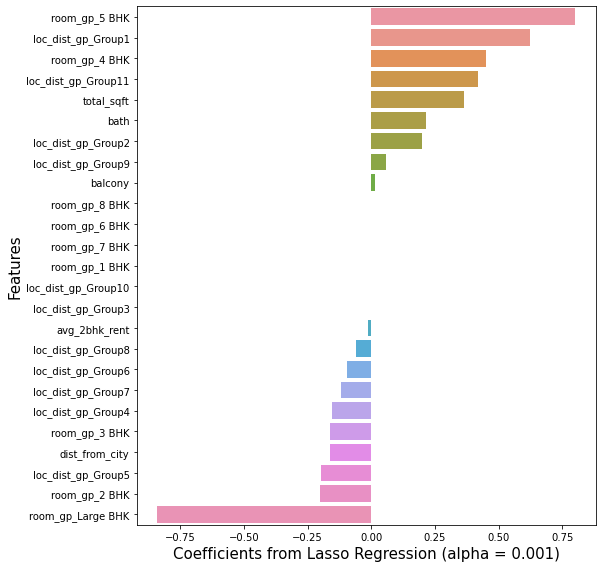

In [167]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()


# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(lasso, 'Lasso Regression (alpha = 0.001)')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

**Interpretation:** The second subplot (on the right) shows that the lasso regression have reduced the coefficients of some variables to zero.

Let us print the list of variables with zero coefficient.

In [168]:
# create a dataframe to store the variable names and their corresponding coefficient values.
df_lasso_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso.coef_})

# print the variables having the coefficient value equal to zero
# 'to_list()' converts the output to the list type
print('Insignificant variables obtained from Lasso Regression when alpha is 0.01')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list()

Insignificant variables obtained from Lasso Regression when alpha is 0.01


['room_gp_1 BHK',
 'room_gp_6 BHK',
 'room_gp_7 BHK',
 'room_gp_8 BHK',
 'loc_dist_gp_Group10',
 'loc_dist_gp_Group3']

In [169]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.001')

# print the datarframe
score_card

Model_Name Alpha (Wherever Required) l1-ratio  \
0  Ridge Regression (with alpha = 1)                         1        -   
1  Ridge Regression (with alpha = 2)                         2        -   
2                   Lasso Regression                     0.001        -   

   R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0   0.459907        0.458219   0.642500 203.989749  
1   0.459874        0.458187   0.642300 203.677561  
2   0.458630        0.456939   0.642400 201.992331

<a id="elastic"></a>
## 6.3 Elastic Net Regression

This technique is a combination of Rigde and Lasso reression techniques. It considers the linear combination of penalties for L1 and L2 regularization.

In [170]:
# use ElasticNet() to perform Elastic Net regression
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'l1_ratio = 0' performs Ridge regression
# 'l1_ratio = 1' performs Lasso regression
# pass number of iterations to 'max_iter'
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

# fit the model on train data
enet.fit(X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 0.6481


**Interpretation:** With the elastic-net regression, we get 0.7984 as the RMSE value.

In [171]:
enet_full = ElasticNet(alpha = 0.001, l1_ratio = 0.01, max_iter = 500)

enet_full.fit(X_Full, y)
rmse,pred=get_train_rmse_full(enet_full)
# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on train set:', rmse)


RMSE on train set: 0.7316


#### Visualize the change in values of coefficients obtained from `MLR_model (using OLS)` and `Elastic Net regression`

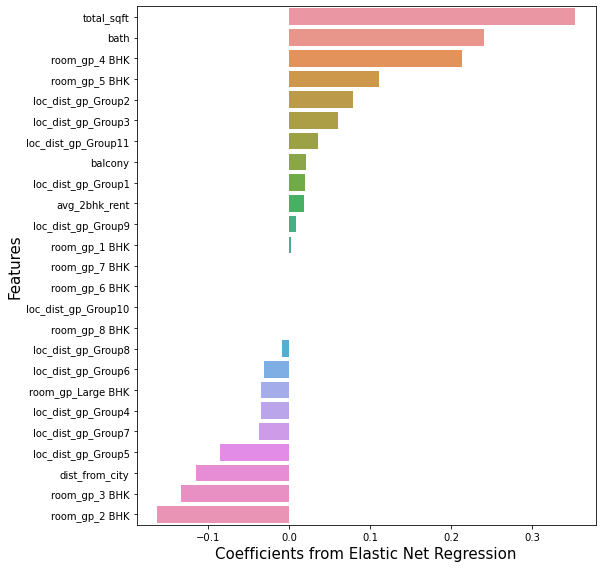

In [172]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()


# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(enet, 'Elastic Net Regression')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

In [173]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')

# print the datarframe
score_card

Model_Name Alpha (Wherever Required) l1-ratio  \
0  Ridge Regression (with alpha = 1)                         1        -   
1  Ridge Regression (with alpha = 2)                         2        -   
2                   Lasso Regression                     0.001        -   
3             Elastic Net Regression                       0.1     0.01   

   R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0   0.459907        0.458219   0.642500 203.989749  
1   0.459874        0.458187   0.642300 203.677561  
2   0.458630        0.456939   0.642400 201.992331  
3   0.431814        0.430039   0.648100 194.802411

<a id="GScv"></a>
# 7. GridSearchCV

Hyperparameters are the parameters in the model that are preset by the user. GridSearch considers all the combinations of hyperparameters and returns the best hyperparameter values. Following are some of the parameters that GridSearchCV takes:

1. estimator: pass the machine learning algorithm model
2. param_grid: takes a dictionary having parameter names as keys and list of parameters as values
3. cv: number of folds for k-fold cross validation

### Find optimal value of alpha for `Ridge Regression`

In [174]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

# print the RMSE for test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 20} 

RMSE on test set: 0.6405


In [175]:
alpha_val=ridge_grid.best_params_.get('alpha')
alpha_val

20

In [176]:
from xgboost import XGBRegressor
xg_grid = XGBRegressor(learning_rate=0.01,max_depth=7,n_estimators=1000)
xg_grid.fit(X_train, y_train)
print('RMSE on test set:', get_test_rmse(xg_grid))
get_train_rmse(xg_grid)

RMSE on test set: 0.5354


0.2691

In [177]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'XGB Regression (using GridSearchCV)', 
                  model = xg_grid, 
                  l1_ratio = '0.01')

# print the datarframe
score_card

Model_Name Alpha (Wherever Required) l1-ratio  \
0    Ridge Regression (with alpha = 1)                         1        -   
1    Ridge Regression (with alpha = 2)                         2        -   
2                     Lasso Regression                     0.001        -   
3               Elastic Net Regression                       0.1     0.01   
4  XGB Regression (using GridSearchCV)                         -     0.01   

   R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0   0.459907        0.458219   0.642500 203.989749  
1   0.459874        0.458187   0.642300 203.677561  
2   0.458630        0.456939   0.642400 201.992331  
3   0.431814        0.430039   0.648100 194.802411  
4   0.930916        0.930700   0.535400 129.366939

## Best Result 104 is achieved with XGB Regressor

In [178]:
from xgboost import XGBRegressor
xg_grid_full = XGBRegressor(learning_rate=0.01,max_depth=7,n_estimators=1000)
xg_grid_full.fit(X_Full, y)
rmse,pred=get_train_rmse_full(xg_grid_full)

print('RMSE on train set:', rmse)
predicted_price=predict_test(xg_grid_full)
price_predicted = (predicted_price * df_target.std()) + df_target.mean()
sample_df.price=price_predicted
sample_df.to_csv("sample_house_xg_grid.csv",index=False,header=['ID', 'price'])

RMSE on train set: 0.282


In [179]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
xg = XGBRegressor(learning_rate=0.01,max_depth=7,n_estimators=1000)

rf = RandomForestRegressor(bootstrap = True, n_estimators= 1000)

dt = DecisionTreeRegressor(criterion='friedman_mse',splitter='random')

#ridge=Ridge(alpha=10)
#lasso=Lasso(alpha= 0.001)

base_models=list()
base_models.append(('xgb',xg))
base_models.append(('rf',rf))
base_models.append(('dt',dt))

meta_model = AdaBoostRegressor(n_estimators=1000)
base_models.append(('meta_model',meta_model))
votesoft = VotingRegressor(estimators=base_models)

votesoft.fit(X_train, y_train)
print('RMSE on test set:', get_test_rmse(votesoft))

update_score_card(algorithm_name = 'Ensemble - Voting', 
                  model = votesoft, 
                 )

votesoft.fit(X_Full, y)
rmse=get_train_rmse_full(votesoft)

print('RMSE on train set:', rmse)
predicted_price=predict_test(votesoft)
sample_df.price=(predicted_price * df_target.std()) + df_target.mean()
sample_df.to_csv("sample_house_voting.csv",index=False,header=['ID', 'price'])



RMSE on test set: 0.5489
RMSE on train set: (0.274, array([-0.41558739,  0.43912144, -0.30559363, ..., -0.35266768,
       -0.40583204, -0.28664923]))


In [180]:
sample_df.head()

ID      price
0   0  70.791690
1   1  69.624622
2   2 113.835679
3   3  56.669592
4   4  99.263710

In [181]:
from sklearn.ensemble import RandomForestRegressor
rf_grid=RandomForestRegressor(bootstrap = True,max_depth = 110, n_estimators= 1000)
rf_grid.fit(X_train, y_train)
print('RMSE on test set:', get_test_rmse(rf_grid))

update_score_card(algorithm_name = 'Random Forest Regressor', 
                  model = rf_grid, 
                 )
score_card

RMSE on test set: 0.5276


Model_Name Alpha (Wherever Required) l1-ratio  \
0    Ridge Regression (with alpha = 1)                         1        -   
1    Ridge Regression (with alpha = 2)                         2        -   
2                     Lasso Regression                     0.001        -   
3               Elastic Net Regression                       0.1     0.01   
4  XGB Regression (using GridSearchCV)                         -     0.01   
5                    Ensemble - Voting                         -        -   
6              Random Forest Regressor                         -        -   

   R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0   0.459907        0.458219   0.642500 203.989749  
1   0.459874        0.458187   0.642300 203.677561  
2   0.458630        0.456939   0.642400 201.992331  
3   0.431814        0.430039   0.648100 194.802411  
4   0.930916        0.930700   0.535400 129.366939  
5   0.927009        0.926781   0.548900 148.884653  
6   0.942189        0.942009   0.527600 131.591965

In [182]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap = True,max_depth = 110, n_estimators= 1000)
rf.fit(X_Full, y)
rmse,pred=get_train_rmse_full(rf)
# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on train set:', rmse)
predicted_price=predict_test(rf)
price_predicted = (predicted_price * df_target.std()) + df_target.mean()
sample_df.price=price_predicted
sample_df.to_csv("sample_house_rf.csv",index=False,header=['ID', 'price'])

RMSE on train set: 0.2365


In [183]:
ridge_grid_full = Ridge(alpha=alpha_val)
ridge_grid_full.fit(X_Full, y)
rmse,pred=get_train_rmse_full(ridge_grid_full)
# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on train set:', rmse)


RMSE on train set: 0.7321


In [184]:
predicted_price=predict_test(ridge_grid_full)
price_predicted = (predicted_price * df_target.std()) + df_target.mean()
sample_df.price=price_predicted
sample_df.to_csv("sample_house_grid.csv",index=False,header=['ID', 'price'])

**Interpretation:** With the optimal value of alpha that we got from GridSearchCV, the RMSE of test set decreased to 0.7812.

In [185]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))

# print the datarframe
score_card

Model_Name Alpha (Wherever Required) l1-ratio  \
0      Ridge Regression (with alpha = 1)                         1        -   
1      Ridge Regression (with alpha = 2)                         2        -   
2                       Lasso Regression                     0.001        -   
3                 Elastic Net Regression                       0.1     0.01   
4    XGB Regression (using GridSearchCV)                         -     0.01   
5                      Ensemble - Voting                         -        -   
6                Random Forest Regressor                         -        -   
7  Ridge Regression (using GridSearchCV)                        20        -   

   R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0   0.459907        0.458219   0.642500 203.989749  
1   0.459874        0.458187   0.642300 203.677561  
2   0.458630        0.456939   0.642400 201.992331  
3   0.431814        0.430039   0.648100 194.802411  
4   0.930916        0.930700   0.535400 129.366939  
5   0.927009        0.926781   0.548900 148.884653  
6   0.942189        0.942009   0.527600 131.591965  
7   0.458248        0.456556   0.640500 200.966281

### Find optimal value of alpha for `Lasso Regression`

In [186]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     
# 'max_iter':100,500,1000,1500,2000
 
# initiate the lasso regression model 
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 0.001} 

RMSE on test set: 0.6424


In [187]:
alpha_best_lasso=lasso_grid.best_params_.get('alpha')
alpha_best_lasso

0.001

In [188]:
lasso_full = Lasso(alpha=alpha_best_lasso)
lasso_full.fit(X_Full, y)
rmse,pred=get_train_rmse_full(lasso_full)
# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on train set:', rmse)

RMSE on train set: 0.7323


In [189]:
pred

array([-0.49804408,  0.90635874, -0.22798533, ..., -0.4111799 ,
       -0.45756415, -0.18715642])

In [190]:
df_target.mean()

111.13654210264063

In [191]:
df_target.std()

145.03654971241872

In [192]:
predicted_price

array([-0.34592704, -0.18593234, -0.00849766, ..., -0.36995925,
        1.8435475 , -0.68283517])

In [193]:
predicted_price=predict_test(lasso_full)
price_predicted = (predicted_price * df_target.std()) + df_target.mean()
sample_df.price=price_predicted
sample_df.to_csv("sample_house_lasso.csv",index=False,header=['ID', 'price'])

**Interpretation:** With the optimal value of alpha that we got from GridSearchCV, the RMSE of test set is 0.7845.

In [194]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lasso_grid, 
                  alpha = lasso_grid.best_params_.get('alpha'))

# print the datarframe
score_card

Model_Name Alpha (Wherever Required) l1-ratio  \
0      Ridge Regression (with alpha = 1)                         1        -   
1      Ridge Regression (with alpha = 2)                         2        -   
2                       Lasso Regression                     0.001        -   
3                 Elastic Net Regression                       0.1     0.01   
4    XGB Regression (using GridSearchCV)                         -     0.01   
5                      Ensemble - Voting                         -        -   
6                Random Forest Regressor                         -        -   
7  Ridge Regression (using GridSearchCV)                        20        -   
8  Lasso Regression (using GridSearchCV)                  0.001000        -   

   R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0   0.459907        0.458219   0.642500 203.989749  
1   0.459874        0.458187   0.642300 203.677561  
2   0.458630        0.456939   0.642400 201.992331  
3   0.431814        0.430039   0.648100 194.802411  
4   0.930916        0.930700   0.535400 129.366939  
5   0.927009        0.926781   0.548900 148.884653  
6   0.942189        0.942009   0.527600 131.591965  
7   0.458248        0.456556   0.640500 200.966281  
8   0.458630        0.456939   0.642400 201.992331

### Find optimal value of alpha for `Elastic Net Regression`

In [195]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.001, 'l1_ratio': 0.2} 

RMSE on test set: 0.6416


In [196]:
enet_grid_full = ElasticNet(alpha = enet_grid.best_params_.get('alpha'), l1_ratio= enet_grid.best_params_.get('l1_ratio'),max_iter = 500)

# fit the model on train set
enet_grid_full.fit(X_Full, y)

rmse,pred=get_train_rmse_full(enet_grid_full)
# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on train set:', rmse)

RMSE on train set: 0.7317


In [197]:
predicted_price=predict_test(enet_grid_full)
price_predicted = (predicted_price * df_target.std()) + df_target.mean()
sample_df.price=price_predicted
sample_df.to_csv("sample_house_enet.csv",index=False,header=['ID', 'price'])

**Interpretation:** With the optimal value of alpha that we got from GridSearchCV, the RMSE of test set is 0.7972.

In [198]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid, 
                  alpha = enet_grid.best_params_.get('alpha'), 
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))

# print the datarframe
score_card

Model_Name Alpha (Wherever Required)  \
0            Ridge Regression (with alpha = 1)                         1   
1            Ridge Regression (with alpha = 2)                         2   
2                             Lasso Regression                     0.001   
3                       Elastic Net Regression                       0.1   
4          XGB Regression (using GridSearchCV)                         -   
5                            Ensemble - Voting                         -   
6                      Random Forest Regressor                         -   
7        Ridge Regression (using GridSearchCV)                        20   
8        Lasso Regression (using GridSearchCV)                  0.001000   
9  Elastic Net Regression (using GridSearchCV)                  0.001000   

  l1-ratio  R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0        -   0.459907        0.458219   0.642500 203.989749  
1        -   0.459874        0.458187   0.642300 203.677561  
2        -   0.458630        0.456939   0.642400 201.992331  
3     0.01   0.431814        0.430039   0.648100 194.802411  
4     0.01   0.930916        0.930700   0.535400 129.366939  
5        -   0.927009        0.926781   0.548900 148.884653  
6        -   0.942189        0.942009   0.527600 131.591965  
7        -   0.458248        0.456556   0.640500 200.966281  
8        -   0.458630        0.456939   0.642400 201.992331  
9 0.200000   0.459293        0.457604   0.641600 202.132412

### Display the score card summary

We sort the dataframe `score_card` to get the model with least RMSE in the top.

In [199]:
# sort the dataframe 'score_card' on 'Test_RMSE' in an ascending order using 'sort_values' 
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)

# color the cell in the column 'Test_RMSE' having minimum RMSE value
# 'style.highlight_min' assigns color to the minimum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

**Interpretation:** We can see that Random Forest Regressor has shown better results , but XGB has better MAPE results and better results when submitted on hackathon site .`XGB  Regression (learning rate 0.01,max_depth=7,n_estimators=1000)` has the lowest test RMSE. Hense using that for the hackathon submission.

In [200]:
from xgboost import XGBRegressor
xg_grid_full = XGBRegressor(learning_rate=0.01,max_depth=7,n_estimators=1000)
xg_grid_full.fit(X_Full, y)
rmse,pred=get_train_rmse_full(xg_grid_full)

print('RMSE on train set:', rmse)
predicted_price=predict_test(xg_grid_full)
price_predicted = (predicted_price * df_target.std()) + df_target.mean()
sample_df.price=price_predicted
sample_df.to_csv("sample_house_xg_grid.csv",index=False,header=['ID', 'price'])

RMSE on train set: 0.282
